In [1]:
import os
print(os.getcwd())
import sys  
sys.path.insert(0, '/Users/franci/MasterThesis/multiomics-perturbation/new_model')
from src_trainer.SCVI_model import SCVI
import warnings

/Users/franci/MasterThesis/multiomics-perturbation/new_model/Training scenario 2


Global seed set to 0


## Import model

In [3]:
my_model = SCVI.load("../input/{}_{}".format('SCVI_RNA', '20220521-155315'))

{'func': 'train_model', 'dataset_path': '../data/czi_data.h5ad', 'model_type': 'SCVI_RNA', 'cat_cov_keys': ['annotation_L1', 'group', 'condition'], 'test_split': None, 'ood_condition': None, 'train_size': 0.8, 'subset_data': 'PG_AD', 'subset_PG': 'LD', 'subset_AD': 'PI', 'n_hvg': 5000, 'seed': 0, 'hparams': {'vae_n_hidden': 128, 'vae_n_latent': 20, 'vae_n_layers': 2, 'vae_dropout': 0.1, 'vae_lr': 0.0001, 'vae_wd': 1e-06, 'batch_size': 128, 'gene_likelihood': 'nb'}, 'max_epochs': 400, 'check_val_every_n_epoch': 20, 'save_dir': '..', 'save_model': True, 'save_anndata': True, 'sweep_seeds': 200, 'model_name': '20220521-155315'}


In [4]:
print(my_model._model_summary_string)

TotalVI Model with the following params: 
n_latent: 20, n_hidden 128, n_layers: 2, gene_likelihood: nb, dropout_rate: 0.1. 
Training conditions: 
Categorical covariates: ['annotation_L1', 'group', 'condition'], Subset data: PG_AD (on PG: LD and ADJ: PI).


## Loss evaluation

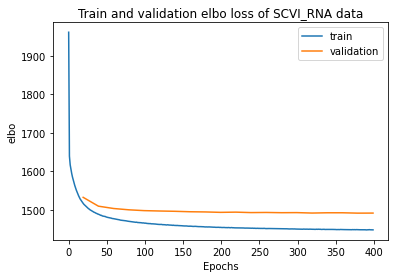

Minimal elbo train value: elbo_train    1447.588135
Name: 399, dtype: object and val value: elbo_validation    1491.228149
Name: 399, dtype: object


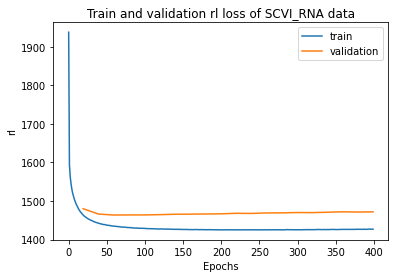

Minimal reconstruction_loss train value: reconstruction_loss_train    1426.841675
Name: 399, dtype: object and val value: reconstruction_loss_validation    1471.988403
Name: 399, dtype: object


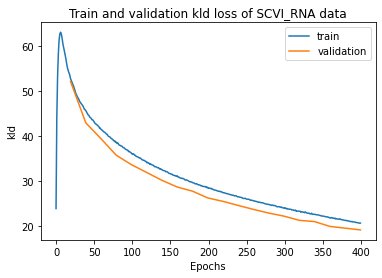

Minimal kl_local train value: kl_local_train    20.746675
Name: 399, dtype: object and val value: kl_local_validation    19.239727
Name: 399, dtype: object


In [5]:
from src_trainer.plotting import plot_single_value, plot_train_val

args_elbo = {'var': "elbo",
             'var_label': "elbo",
             'ylim': None,
             'modality': my_model.args['model_type']
             }
args_rl = {'var': "reconstruction_loss",
           'var_label': "rl",
           'ylim': None,
           'modality': my_model.args['model_type']
           }
args_kld = {'var': "kl_local",
            'var_label': "kld",
            'ylim': None,
            'modality': my_model.args['model_type']
            }

list_args = [args_elbo, args_rl, args_kld]

for plot_args in list_args:
    if my_model.args['check_val_every_n_epoch'] is not None:
        plot_train_val(my_model, plot_args=plot_args, pdf=None)
    else:
        plot_single_value(my_model, plot_args, 'train')
    print("Minimal {} train value: {} and val value: {}".format(
        plot_args['var'], 
        my_model.history['{}_train'.format(plot_args['var'])].iloc[-1],
        my_model.history['{}_validation'.format(plot_args['var'])].iloc[-1],
    ))

# Evaluation reconstructions

In [6]:
from src_trainer.plotting import evaluate_corr, boxplot_corr

cond_dict = {'group': 'LD',
             'annotation_L1': None,
             'condition': 'PI'}

marker_dict = {'CD4T': [['CD3D', 'CD4'], ['CD3_ADT', 'CD4_ADT']],
                'B': [['MS4A1', 'CD19', 'CD79A'], ['CD19_ADT', 'CD20_ADT']],
                'Monocyte': [['S100A9', 'CD14'], ['CD14_ADT', 'CD16_ADT']]}

col_conds = [{'PG': 'LD', 'ADJ': 'medium'}, 
             {'PG': 'DK', 'ADJ': 'medium'},
             {'PG': 'RT', 'ADJ': 'medium'},
             {'PG': 'LD', 'ADJ': 'PI'},
             {'PG': 'DK', 'ADJ': 'PI'},
             {'PG': 'RT', 'ADJ': 'PI'}]

#all_markers = my_model.adata.var_names
#data = my_model.adata.copy()

## Spearman correlations

### Posterior sampling

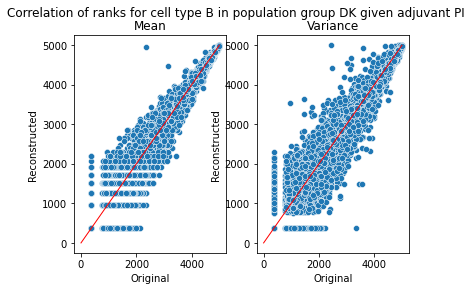

The gene with the highest rank is in true is: MALAT1 and pred: MALAT1


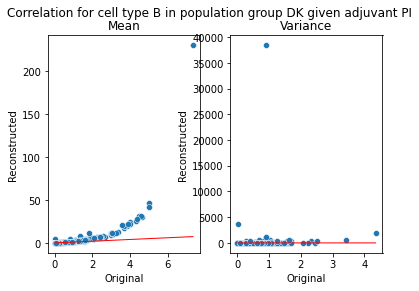

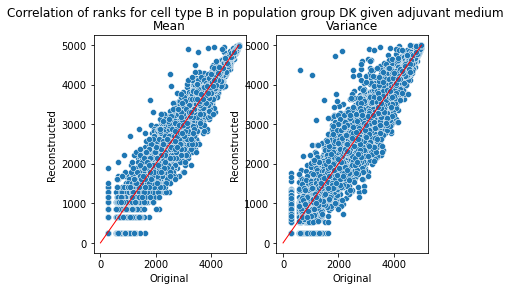

The gene with the highest rank is in true is: MALAT1 and pred: MALAT1


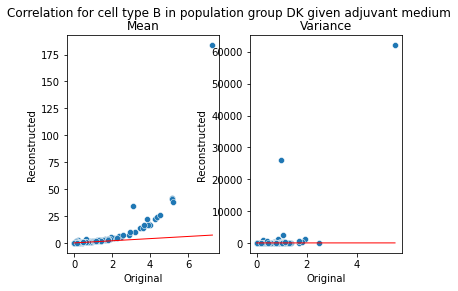

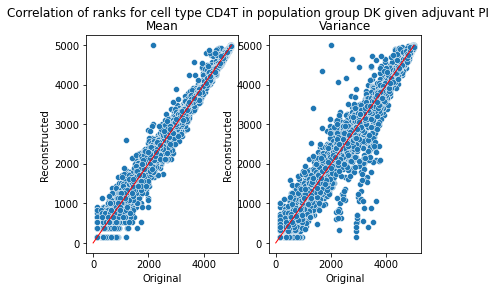

The gene with the highest rank is in true is: MALAT1 and pred: MALAT1


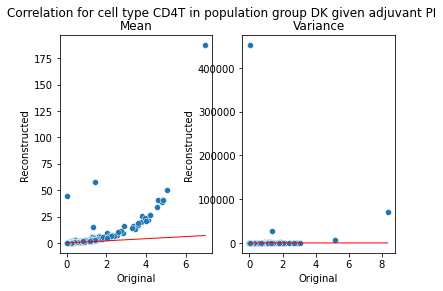

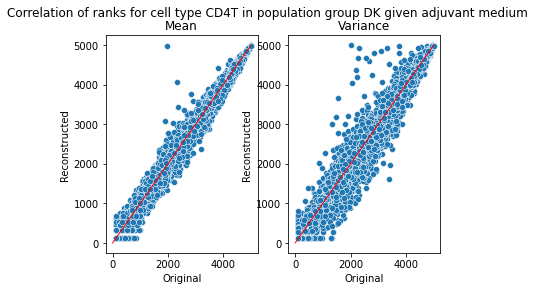

The gene with the highest rank is in true is: MALAT1 and pred: MALAT1


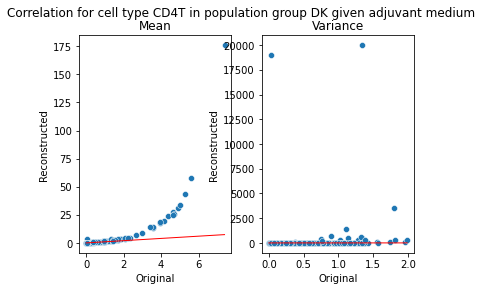

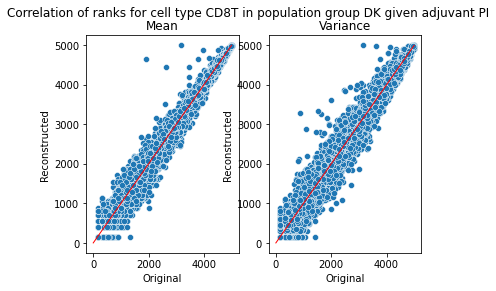

The gene with the highest rank is in true is: MALAT1 and pred: MALAT1


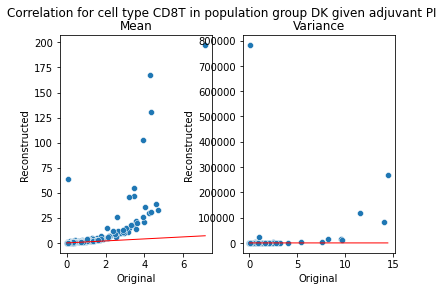

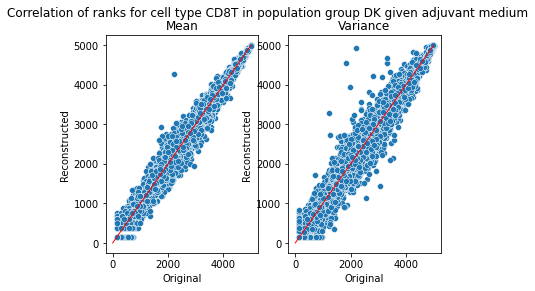

The gene with the highest rank is in true is: MALAT1 and pred: MALAT1


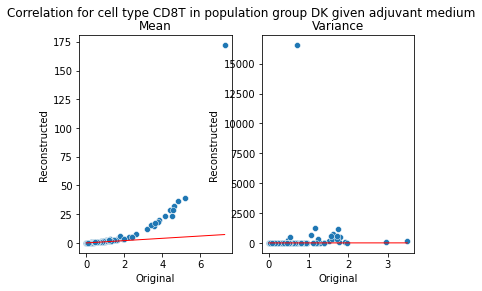

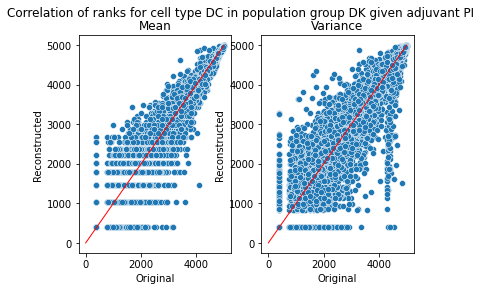

The gene with the highest rank is in true is: MALAT1 and pred: MALAT1


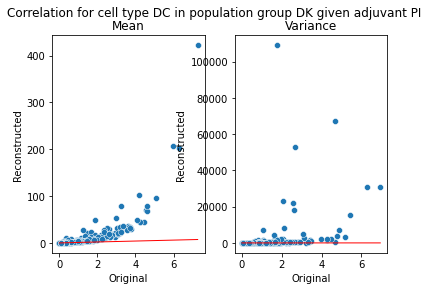

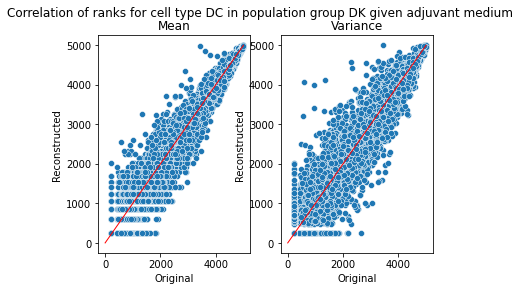

The gene with the highest rank is in true is: MALAT1 and pred: MALAT1


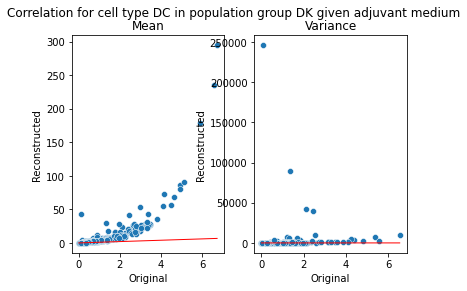

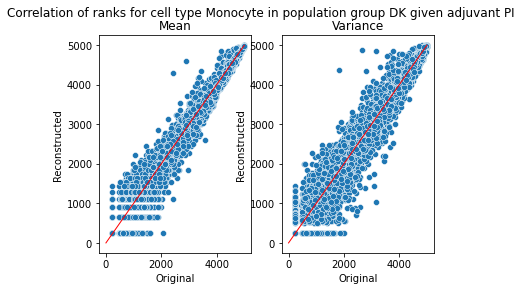

The gene with the highest rank is in true is: MALAT1 and pred: MALAT1


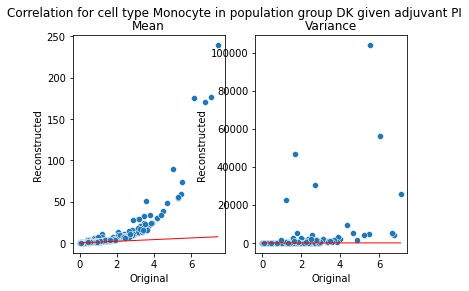

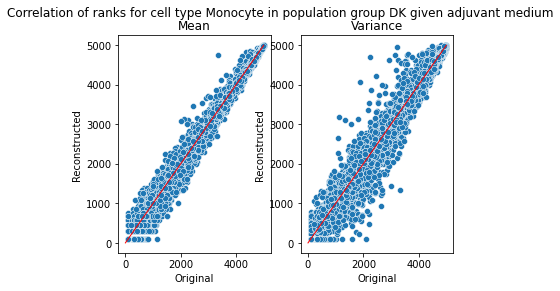

The gene with the highest rank is in true is: FTH1 and pred: FTH1


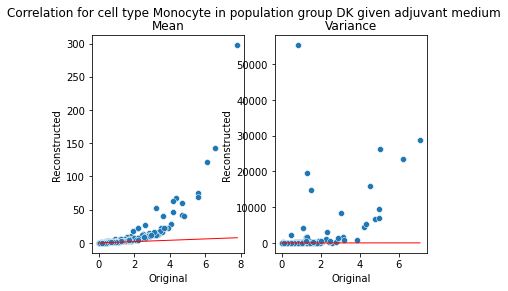

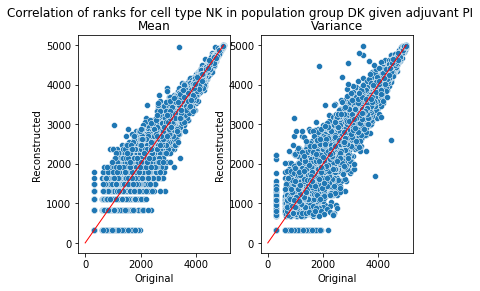

The gene with the highest rank is in true is: MALAT1 and pred: MALAT1


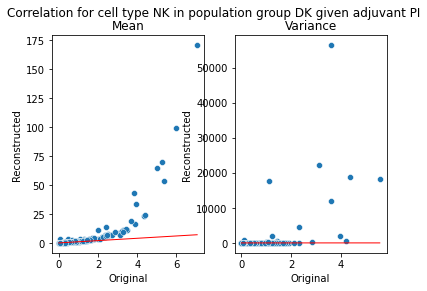

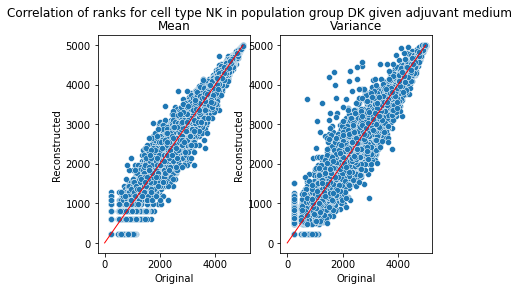

The gene with the highest rank is in true is: MALAT1 and pred: MALAT1


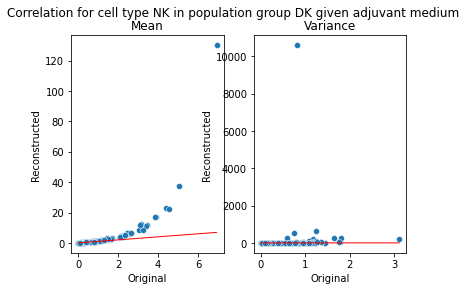

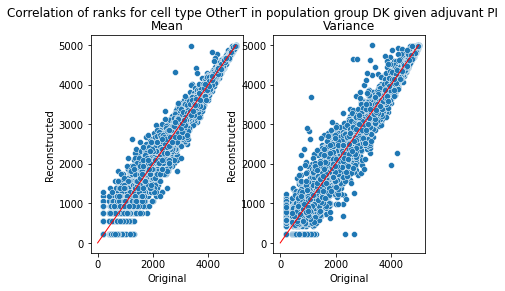

The gene with the highest rank is in true is: MALAT1 and pred: MALAT1


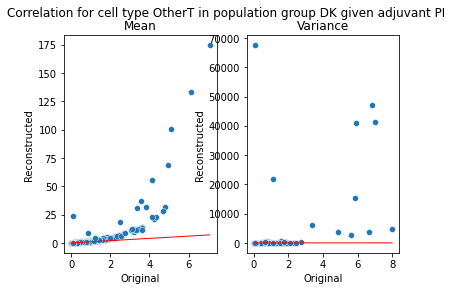

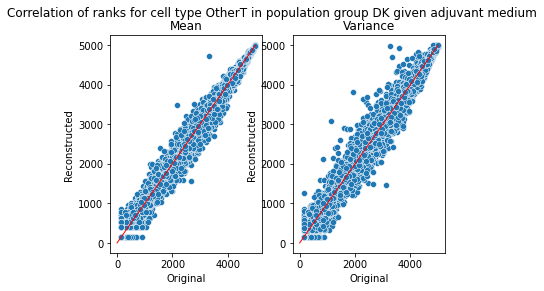

The gene with the highest rank is in true is: MALAT1 and pred: MALAT1


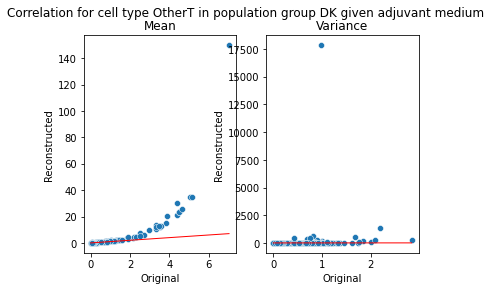

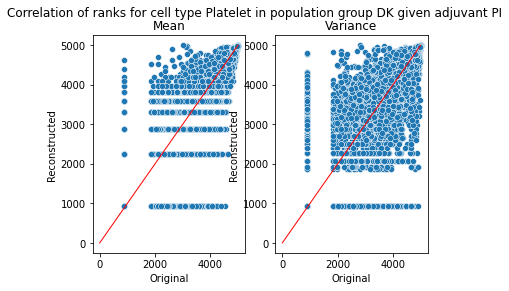

The gene with the highest rank is in true is: MALAT1 and pred: MALAT1


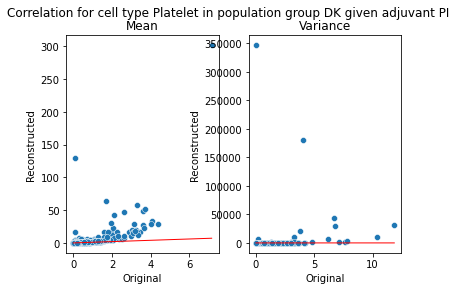

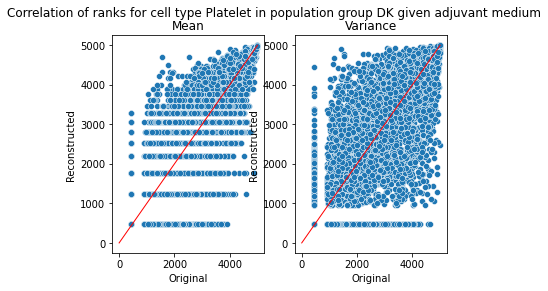

The gene with the highest rank is in true is: MALAT1 and pred: MALAT1


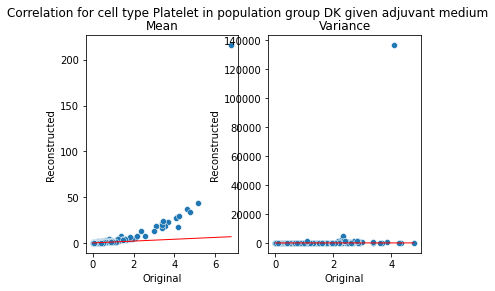

Invalid combination: LD, B and PI


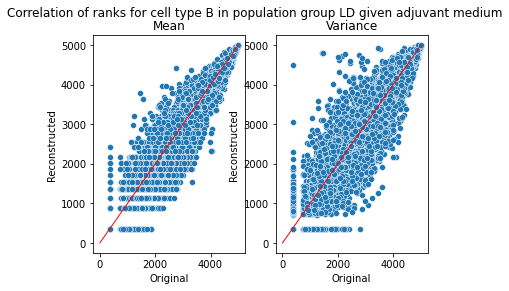

The gene with the highest rank is in true is: MALAT1 and pred: MALAT1


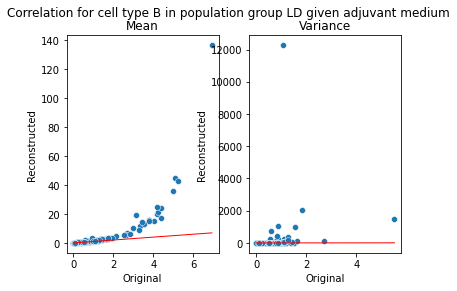

Invalid combination: LD, CD4T and PI


In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    df = evaluate_corr(my_model, sample_dist = "posterior", plot_corr=True, plot_ranks=True)  
    

Plot ranks

In [ ]:
boxplot_corr('../results/csv_2/{}_{}_{}'.format(my_model.args['model_type'], my_model.args['model_name'], 'posterior'), 
             col_conds, 
             score = "corr_mean")

### Prior sampling

Start running


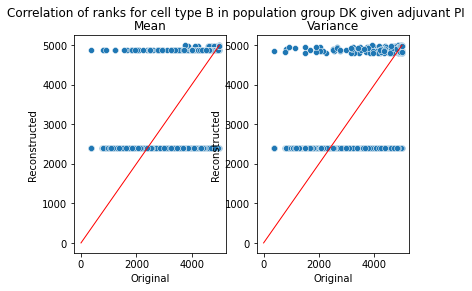

The gene with the highest rank is in true is: MALAT1 and pred: MALAT1


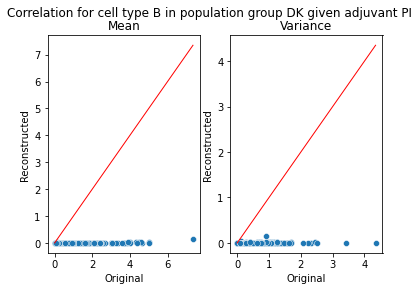

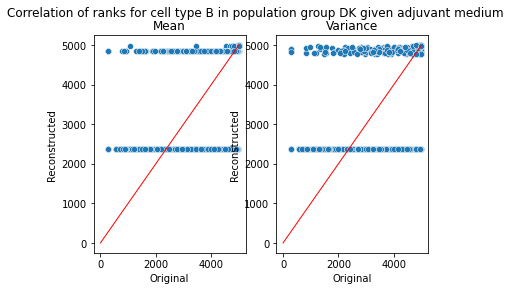

The gene with the highest rank is in true is: MALAT1 and pred: MALAT1


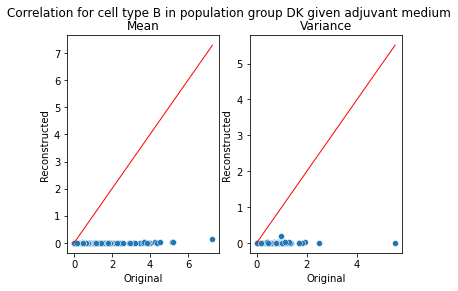

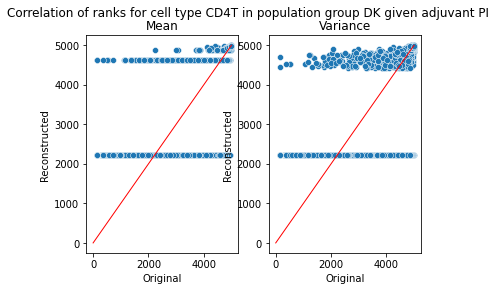

The gene with the highest rank is in true is: MALAT1 and pred: MALAT1


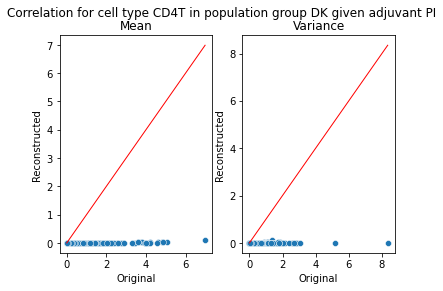

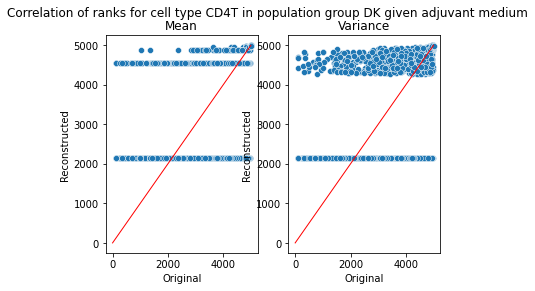

The gene with the highest rank is in true is: MALAT1 and pred: MALAT1


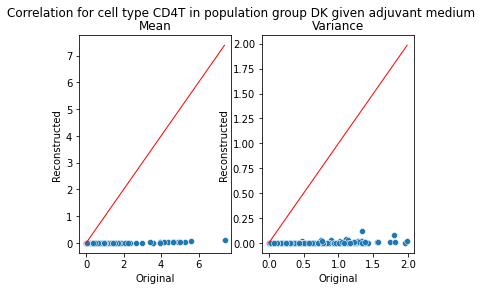

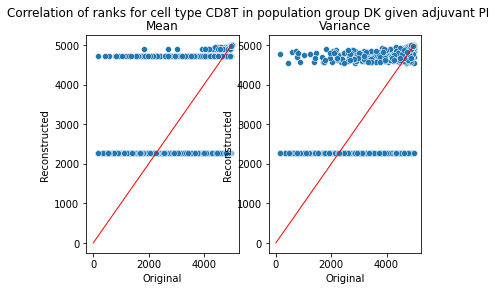

The gene with the highest rank is in true is: MALAT1 and pred: MALAT1


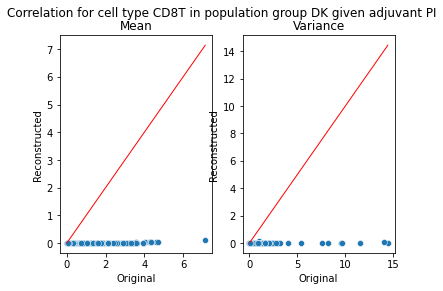

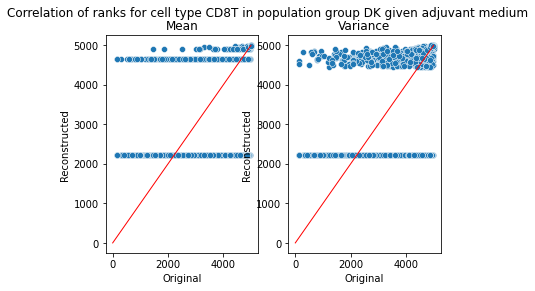

The gene with the highest rank is in true is: MALAT1 and pred: MALAT1


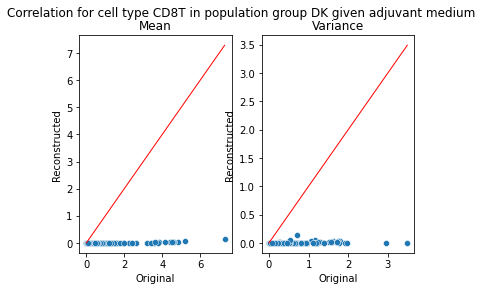

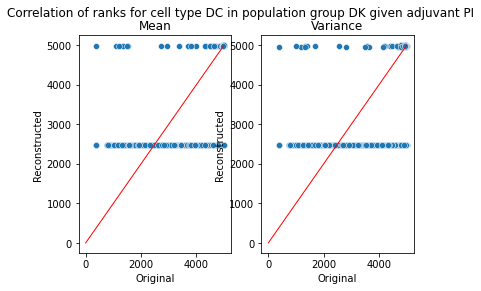

The gene with the highest rank is in true is: MALAT1 and pred: FTH1


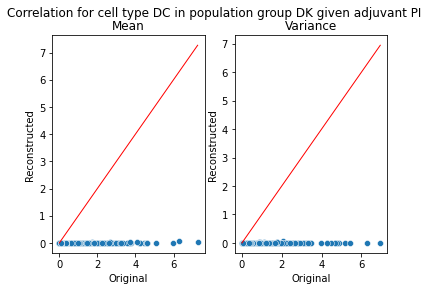

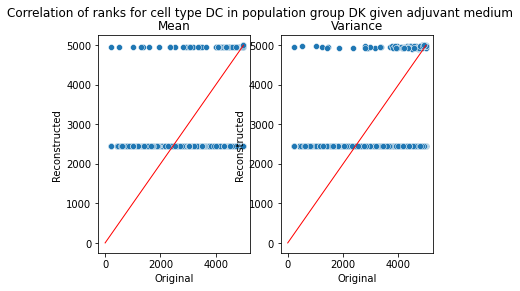

The gene with the highest rank is in true is: MALAT1 and pred: MALAT1


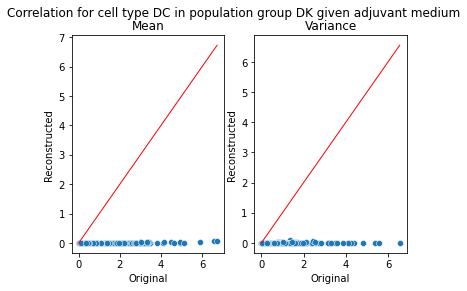

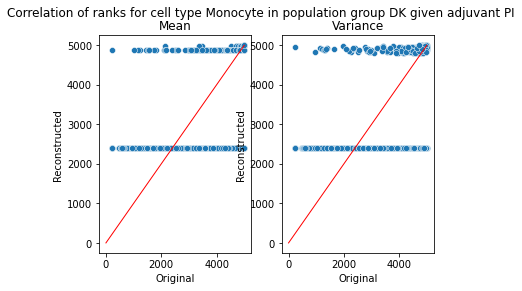

The gene with the highest rank is in true is: MALAT1 and pred: MALAT1


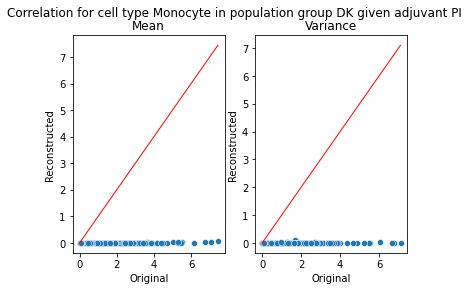

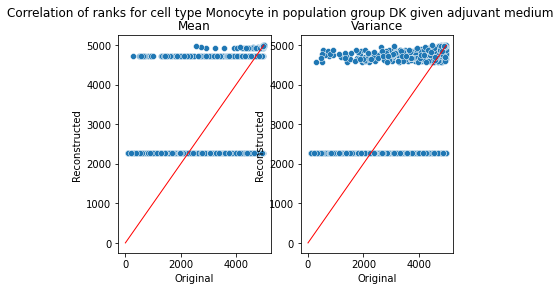

The gene with the highest rank is in true is: FTH1 and pred: FTH1


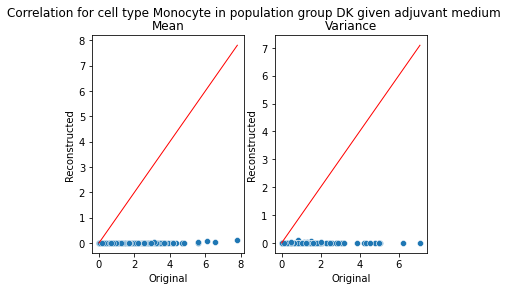

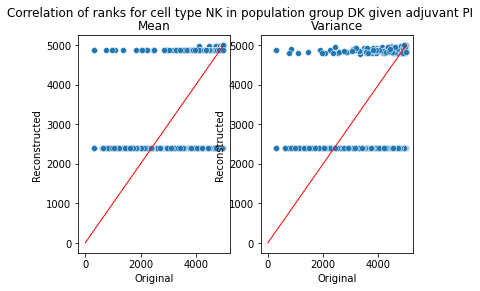

The gene with the highest rank is in true is: MALAT1 and pred: MALAT1


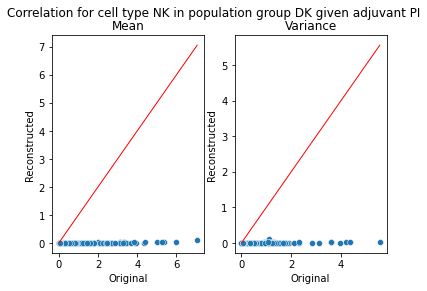

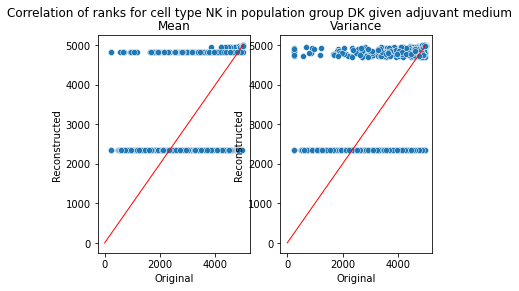

The gene with the highest rank is in true is: MALAT1 and pred: MALAT1


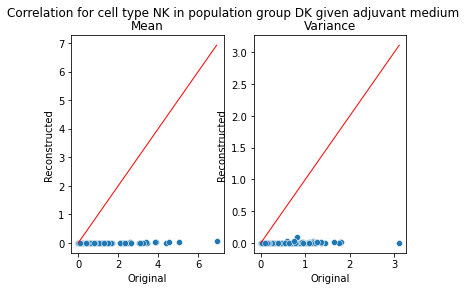

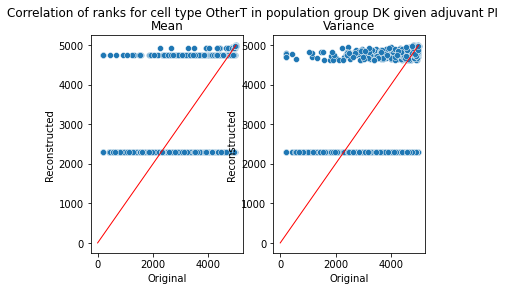

The gene with the highest rank is in true is: MALAT1 and pred: MALAT1


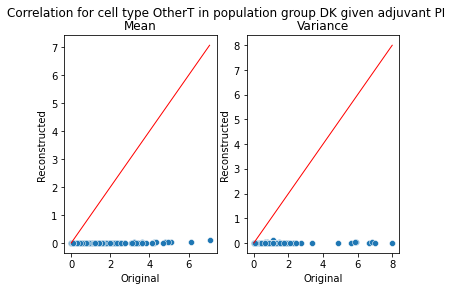

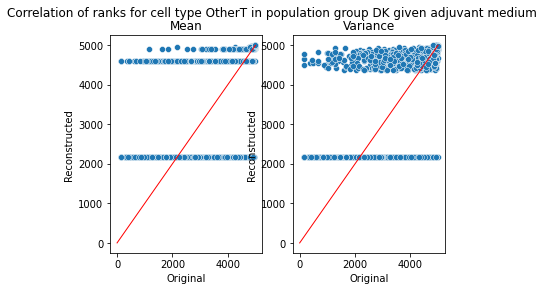

The gene with the highest rank is in true is: MALAT1 and pred: MALAT1


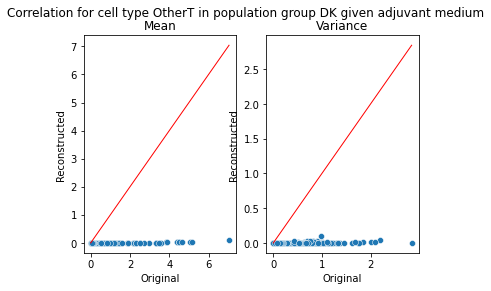

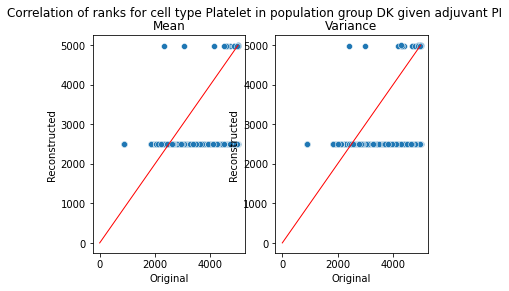

The gene with the highest rank is in true is: MALAT1 and pred: RPL39


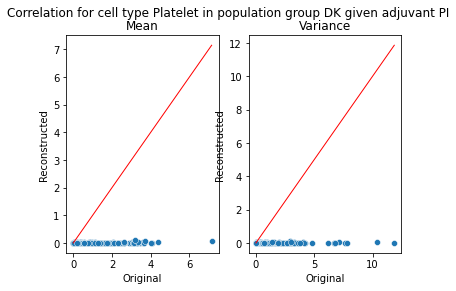

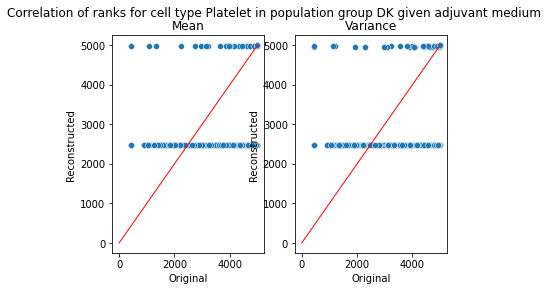

The gene with the highest rank is in true is: MALAT1 and pred: MALAT1


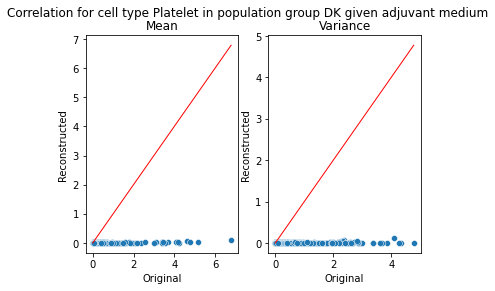

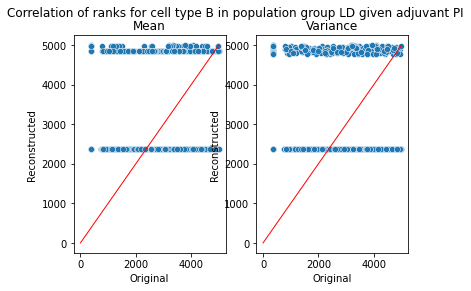

The gene with the highest rank is in true is: MPEG1 and pred: MALAT1


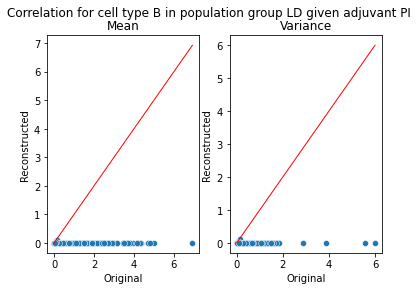

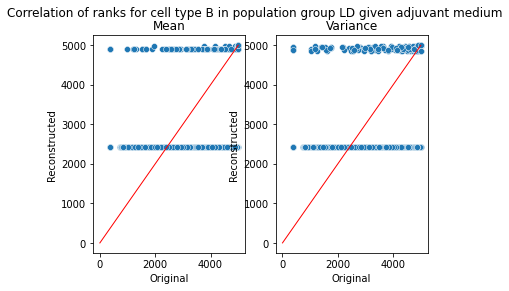

The gene with the highest rank is in true is: MALAT1 and pred: MALAT1


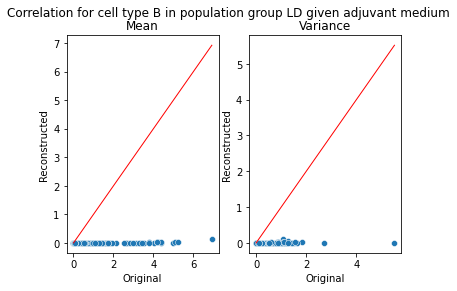

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    print("Start running")
    df = evaluate_corr(my_model, sample_dist = "prior", plot_corr=True, plot_ranks = True, eval_hvg=False)  

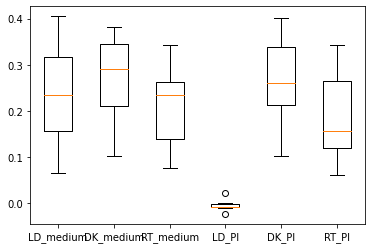

In [5]:
boxplot_corr('../results/csv/{}_{}_{}'.format(my_model.args['model_type'], my_model.args['model_name'], 'prior'), 
             col_conds, 
             score = "corr_mean")

### Transfer sampling

Transfer sampling


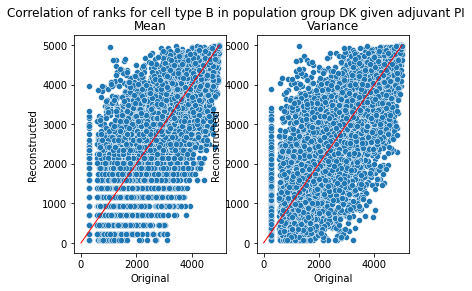

The gene with the highest rank is in true is: MALAT1 and pred: MALAT1


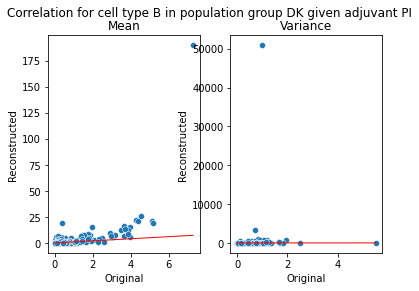

Transfer sampling


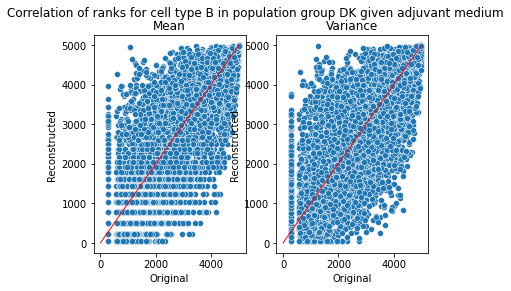

The gene with the highest rank is in true is: MALAT1 and pred: MALAT1


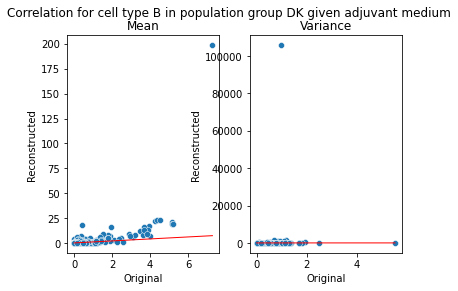

Transfer sampling


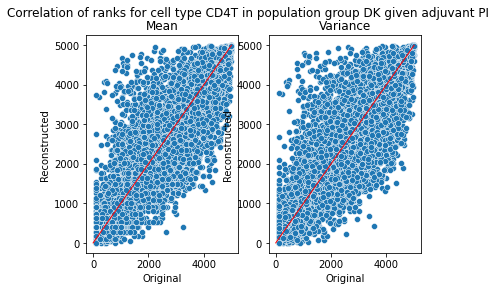

The gene with the highest rank is in true is: MALAT1 and pred: MALAT1


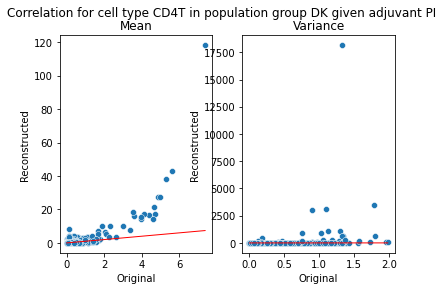

Transfer sampling


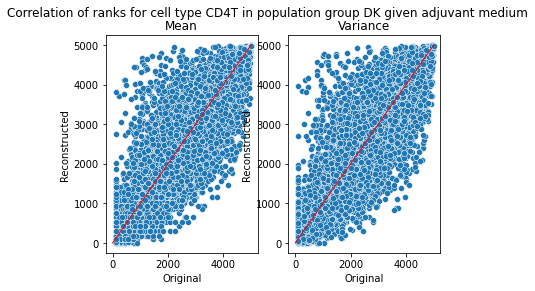

The gene with the highest rank is in true is: MALAT1 and pred: MALAT1


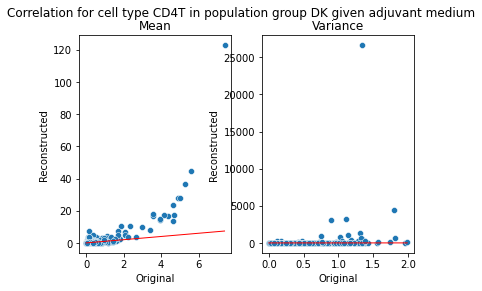

Transfer sampling


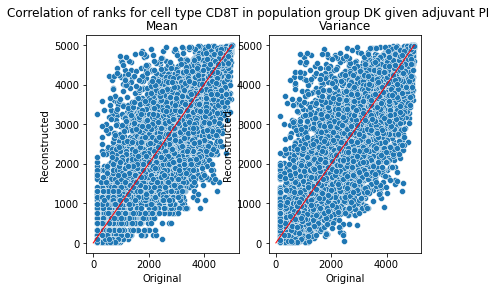

The gene with the highest rank is in true is: MALAT1 and pred: MALAT1


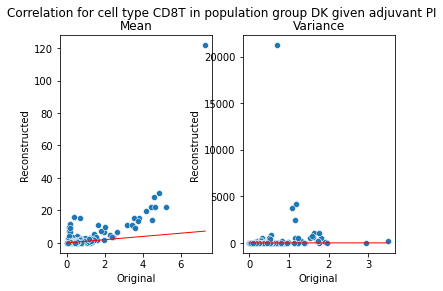

Transfer sampling


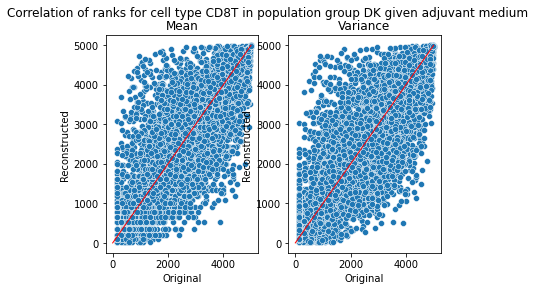

The gene with the highest rank is in true is: MALAT1 and pred: MALAT1


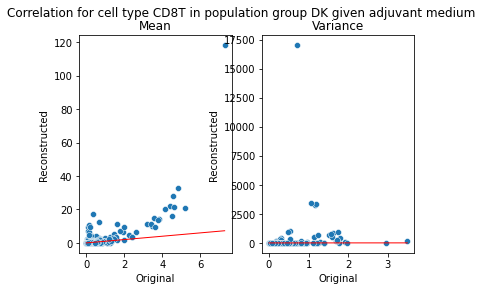

Transfer sampling


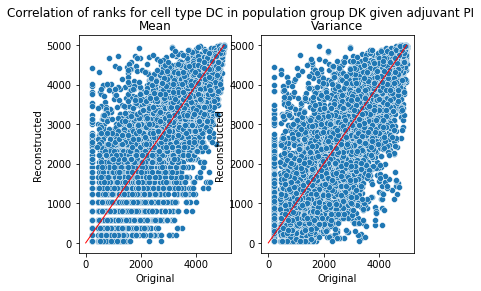

The gene with the highest rank is in true is: MALAT1 and pred: MALAT1


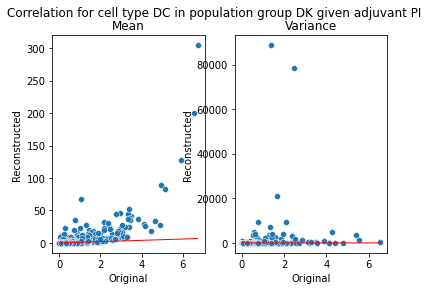

Transfer sampling


In [ ]:
evaluate_corr(my_model, sample_dist = "transfer", plot_corr=True, plot_ranks = True)

In [ ]:
boxplot_corr('../results/csv/{}_{}_{}'.format(my_model.args['model_type'], my_model.args['model_name'], 'transfer'), 
             col_conds, 
             score = "corr_mean")
